In [2]:
from itertools import product, combinations, compress
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm

# Hydrogen Bond


In [3]:
hbonddata = pd.read_csv("../data/hbonddata.csv")
frag = eval(open("../data/hbondfeaturedict.txt").readline())

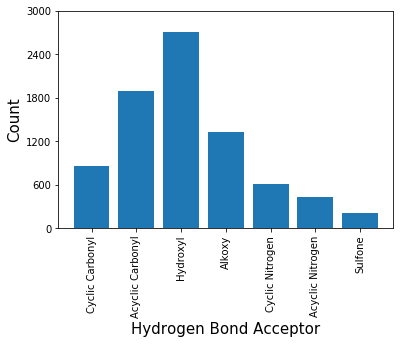

In [4]:
# Types of Receptors
# 0: Carbonyl (carbon in a ring)
# 1: Carbonyl (carbon not in a ring)
# 2: Hydroxyl
# 3: Alkoxy
# 4: Cyclic Nitrogen
# 5: Acyclic Nitrogen
# 6: Sulfone
receptors, rcount = np.unique(hbonddata.Receptor,return_counts=True)
plt.bar(receptors,rcount)
plt.ylabel("Count",fontsize=15)
plt.yticks([0,600,1200,1800,2400,3000])
plt.xticks(range(7), labels=["Cyclic Carbonyl", "Acyclic Carbonyl","Hydroxyl","Alkoxy", "Cyclic Nitrogen", "Acyclic Nitrogen", "Sulfone"], rotation=90)
plt.xlabel("Hydrogen Bond Acceptor", size=15)
plt.show()

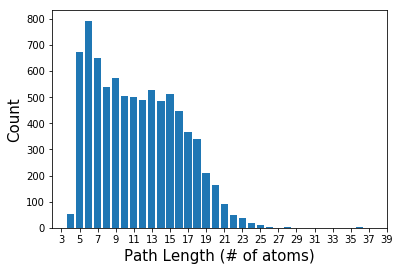

In [5]:
# Path Length
# Size of Path Features + 2 = Number of atoms from H-bond donor to H-bond acceptor
pathlength,plcount = np.unique([len(eval(path))+2 for path in hbonddata.PathFeatures],return_counts=True)
plt.bar(pathlength,plcount)
plt.xlabel("Path Length (# of atoms)",size=15)
plt.ylabel("Count",size=15)
plt.xticks(range(3,40,2))
plt.show()

In [6]:
def GetJunctionMatrix(dataframe, receptor):
    subgroup = dataframe.groupby("Receptor").get_group(receptor)
    matrix = np.zeros([len(frag),10])
    for row in subgroup.iterrows():
        pathsize = len(eval(row[1][1]))
        if pathsize<=10:
            K = pathsize/2 if pathsize%2==0 else (pathsize+1)/2
            for i,x in enumerate(eval(row[1][1])):
                if i<K:
                    r = frag.index(x)
                    c = i
                    matrix[r,c]+=1
                else:
                    r = frag.index(x)
                    c = 10-(pathsize-i)
                    matrix[r,c]+=1
    return matrix

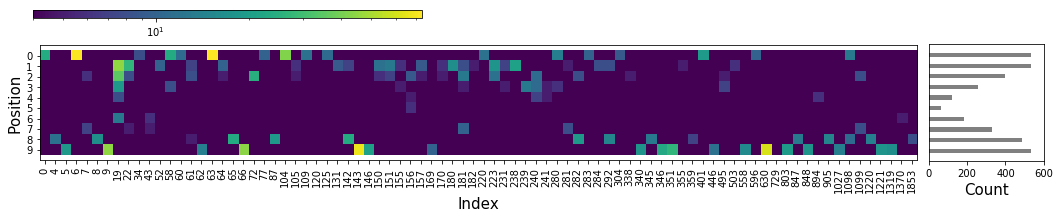

In [7]:
# Carbonyl (Carbon in a ring)
type_0_mat = GetJunctionMatrix(hbonddata,0)
# We select frequently observed features only (not showing the full matrix)
type_0_mat_submatrix = type_0_mat[type_0_mat.sum(axis=1)>=9] 

fig = plt.figure(figsize=(18,2.15))
gs = gridspec.GridSpec(nrows=1, ncols=8, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:7])
ax0_marg_x = fig.add_subplot(gs[0,7],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(type_0_mat_submatrix+1), interpolation="nearest",norm=LogNorm(vmin=4, vmax=np.max(type_0_mat_submatrix)))
cbaxes = fig.add_axes([0.12, 1.05,0.3,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,type_0_mat_submatrix.shape[0]))
ax0_joint.set_xticklabels(np.where(type_0_mat.sum(axis=1)>=9)[0],fontsize=10,rotation=90)
ax0_joint.set_yticks(np.arange(10))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(10)),type_0_mat.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,601,200))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()

In [104]:
# frequently observed features at position 0, example 6
print(frag[6])
# 866 indicate oxygen-carbon-carbon
# 444 indicate sp3-sp3-sp3
# 000 indicate not-in-ring*3
# 000 indicate not-in-ring*3

print(frag[63])
# 866 indicate oxygen-carbon-carbon
# 444 indicate sp3-sp3-sp3
# 011 indicate not-in-ring, in ring number 1, in ring number 1.  
# 011 indicate not-in-ring, ring-membership 1, ring membership 1  

# ring number is the number of URF  that have been explored 
# URF 1 = 0,1,2,3,4,5   URF 2 = 6,7,8,9,4,5
# for example fused ring c1cccc2c1cccc2,  the path [3,4,9] 
# atoms 3 and 4 can be found in URF 1 and atom 9 is only in URF2  --> 112  

# ring-membership is the number of URFS containing the atoms of interest.
# For example fused ring c1cccc2c1cccc2.  The ring membership of fused ring atoms [atom 4,5] are 2, otherwise 1. 


866444000000
866444011011


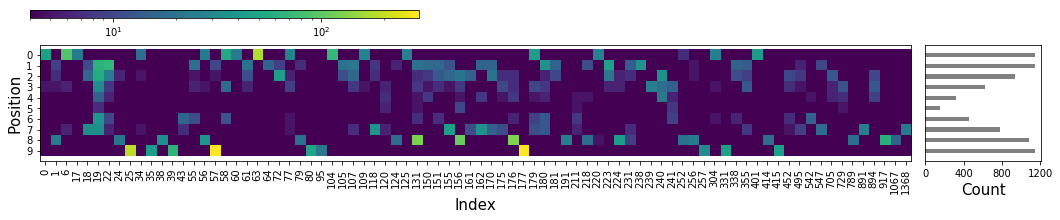

In [8]:
# Carbonyl (carbon not in a ring)
type_1_mat = GetJunctionMatrix(hbonddata,1)
# We select frequently observed features only (not showing the full matrix)
type_1_mat_submatrix = type_1_mat[type_1_mat.sum(axis=1)>=20]

fig = plt.figure(figsize=(18,2.15))
gs = gridspec.GridSpec(nrows=1, ncols=8, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:7])
ax0_marg_x = fig.add_subplot(gs[0,7],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(type_1_mat_submatrix+1), interpolation="nearest",norm=LogNorm(vmin=4, vmax=np.max(type_1_mat_submatrix)))
cbaxes = fig.add_axes([0.12, 1.05,0.3,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,type_1_mat_submatrix.shape[0]))
ax0_joint.set_xticklabels(np.where(type_1_mat.sum(axis=1)>=20)[0],fontsize=10,rotation=90)
ax0_joint.set_yticks(np.arange(10))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(10)),type_1_mat.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,1201,400))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()

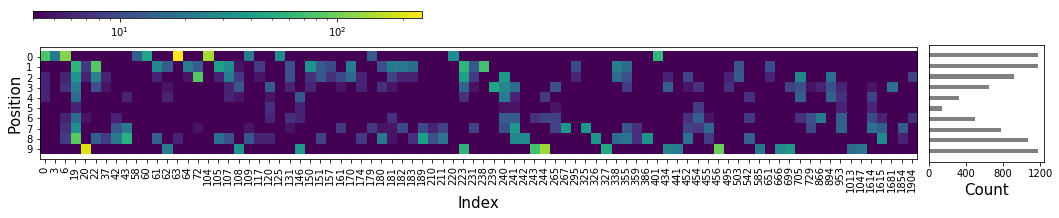

In [9]:
# Hydroxyl
type_2_mat = GetJunctionMatrix(hbonddata,2)
# We select frequently observed features only (not showing the full matrix)
type_2_mat_submatrix = type_2_mat[type_2_mat.sum(axis=1)>=19]

fig = plt.figure(figsize=(18,2.15))
gs = gridspec.GridSpec(nrows=1, ncols=8, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:7])
ax0_marg_x = fig.add_subplot(gs[0,7],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(type_2_mat_submatrix+1), interpolation="nearest",norm=LogNorm(vmin=4, vmax=np.max(type_2_mat_submatrix)))
cbaxes = fig.add_axes([0.12, 1.05,0.3,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,type_2_mat_submatrix.shape[0]))
ax0_joint.set_xticklabels(np.where(type_2_mat.sum(axis=1)>=19)[0],fontsize=10,rotation=90)
ax0_joint.set_yticks(np.arange(10))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(10)),type_2_mat.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,1201,400))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()

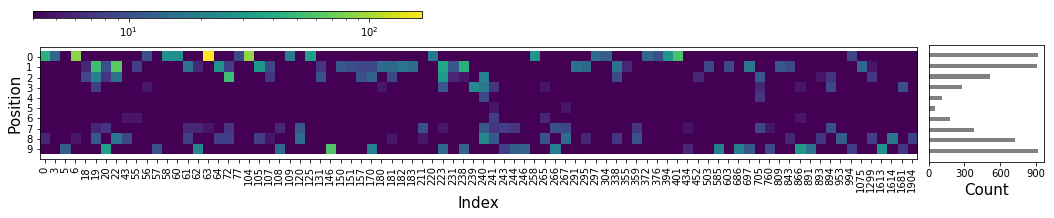

In [10]:
# Alkoxy
type_3_mat = GetJunctionMatrix(hbonddata,3)
# We select frequently observed features only instead showing the full matrix
type_3_mat_submatrix = type_3_mat[type_3_mat.sum(axis=1)>=13]

fig = plt.figure(figsize=(18,2.15))
gs = gridspec.GridSpec(nrows=1, ncols=8, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:7])
ax0_marg_x = fig.add_subplot(gs[0,7],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(type_3_mat_submatrix+1), interpolation="nearest",norm=LogNorm(vmin=4, vmax=np.max(type_3_mat_submatrix)))
cbaxes = fig.add_axes([0.12, 1.05,0.3,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,type_3_mat_submatrix.shape[0]))
ax0_joint.set_xticklabels(np.where(type_3_mat.sum(axis=1)>=13)[0],fontsize=10,rotation=90)
ax0_joint.set_yticks(np.arange(10))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(10)),type_3_mat.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,1001,300))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()

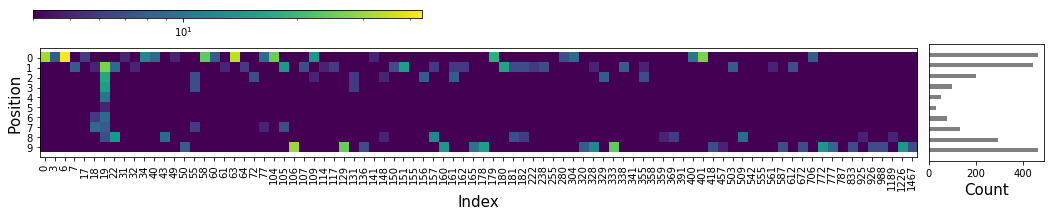

In [11]:
# Cyclic Nitrogen
type_4_mat = GetJunctionMatrix(hbonddata,4)
# We select frequently observed features only (not showing the full matrix)
type_4_mat_submatrix = type_4_mat[type_4_mat.sum(axis=1)>=6]

fig = plt.figure(figsize=(18,2.15))
gs = gridspec.GridSpec(nrows=1, ncols=8, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:7])
ax0_marg_x = fig.add_subplot(gs[0,7],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(type_4_mat_submatrix+1), interpolation="nearest",norm=LogNorm(vmin=4, vmax=np.max(type_4_mat_submatrix)))
cbaxes = fig.add_axes([0.12, 1.05,0.3,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,type_4_mat_submatrix.shape[0]))
ax0_joint.set_xticklabels(np.where(type_4_mat.sum(axis=1)>=6)[0],fontsize=10,rotation=90)
ax0_joint.set_yticks(np.arange(10))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(10)),type_4_mat.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,501,200))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()

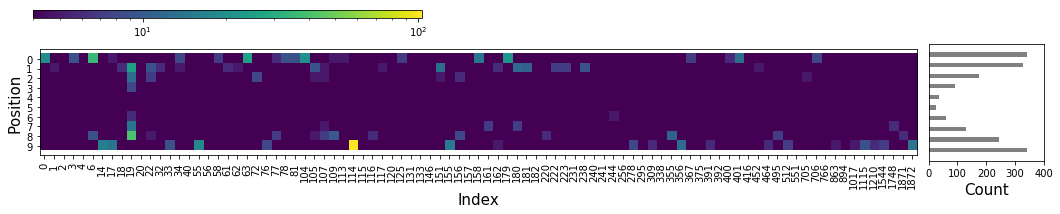

In [12]:
# Cyclic Nitrogen
type_5_mat = GetJunctionMatrix(hbonddata,5)
# We select frequently observed features only (not showing the full matrix)
type_5_mat_submatrix = type_5_mat[type_5_mat.sum(axis=1)>=5]
fig = plt.figure(figsize=(18,2.15))
gs = gridspec.GridSpec(nrows=1, ncols=8, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:7])
ax0_marg_x = fig.add_subplot(gs[0,7],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(type_5_mat_submatrix+1), interpolation="nearest",norm=LogNorm(vmin=4, vmax=np.max(type_5_mat_submatrix)))
cbaxes = fig.add_axes([0.12, 1.05,0.3,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,type_5_mat_submatrix.shape[0]))
ax0_joint.set_xticklabels(np.where(type_5_mat.sum(axis=1)>=5)[0],fontsize=10,rotation=90)
ax0_joint.set_yticks(np.arange(10))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(10)),type_5_mat.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,401,100))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()

# $\pi-\pi$ Stacking

In [13]:
pidata = pd.read_csv("../data/pipistackdata.txt")
pifrag = eval(open("../data/pipistackfeature.txt").readline())

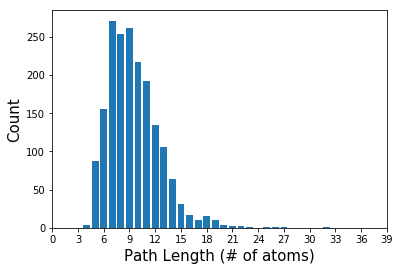

In [14]:
pistackpathsize = [len(eval(path))+2 for path in pidata.PathFeature]
psize, pcount = np.unique(pistackpathsize, return_counts=True)
plt.bar(psize,pcount)
plt.xticks(np.arange(0,40,3))
plt.xlabel("Path Length (# of atoms)",size=15)
plt.ylabel("Count",size=15)
plt.show()

In [15]:
def GetPiStackJunctionMatrix(dataframe, group):
    subgroup = dataframe.groupby("FunctionalGroup").get_group(group)
    matrix = np.zeros([len(pifrag),15])
    for row in subgroup.iterrows():
        pathsize = len(eval(row[1][1]))
        if pathsize<=15:
            K = pathsize/2 if pathsize%2==0 else (pathsize+1)/2
            for i,x in enumerate(eval(row[1][1])):
                if i<K:
                    r = pifrag.index(x)
                    c = i
                    matrix[r,c]+=1
                else:
                    r = pifrag.index(x)
                    c = 15-(pathsize-i)
                    matrix[r,c]+=1
    return matrix

# Carbamate

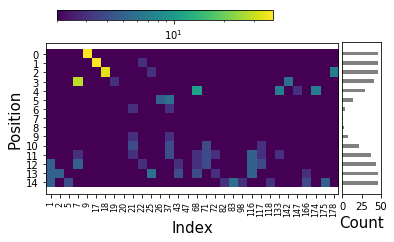

In [16]:
carbamate_mat = GetPiStackJunctionMatrix(pidata,0)
# Show top rank features only
sub_carbamate = carbamate_mat[carbamate_mat.sum(axis=1)>2]
fig = plt.figure(figsize=(6,2.8))
gs = gridspec.GridSpec(nrows=1, ncols=8, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:7])
ax0_marg_x = fig.add_subplot(gs[0,7],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(sub_carbamate+1), interpolation="nearest",norm=LogNorm(vmin=2, vmax=np.max(sub_carbamate)))
cbaxes = fig.add_axes([0.15, 0.99,0.5,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,sub_carbamate.shape[0]))
ax0_joint.set_xticklabels(np.where(carbamate_mat.sum(axis=1)>=2)[0],fontsize=8,rotation=90)
ax0_joint.set_yticks(np.arange(15))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(15)),carbamate_mat.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,60,25))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()

# Urea

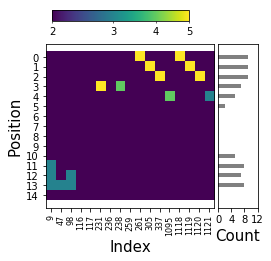

In [17]:
urea_1 = GetPiStackJunctionMatrix(pidata,1)
urea_1_mat = urea_1[urea_1.sum(axis=1)>2]
fig = plt.figure(figsize=(3.8,3))
gs = gridspec.GridSpec(nrows=1, ncols=5, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:4])
ax0_marg_x = fig.add_subplot(gs[0,4],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(urea_1_mat+1), interpolation="nearest",norm=LogNorm(vmin=2, vmax=np.max(urea_1_mat)))
cbaxes = fig.add_axes([0.15, 0.99,0.5,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,urea_1_mat.shape[0]))
ax0_joint.set_xticklabels(np.where(urea_1.sum(axis=1)>=2)[0],fontsize=8,rotation=90)
ax0_joint.set_yticks(np.arange(15))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(15)),urea_1_mat.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,15,4))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()

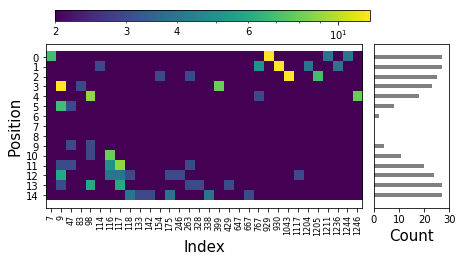

In [18]:
urea_2 = GetPiStackJunctionMatrix(pidata,2)
# Show top rank features only
urea_2_mat = urea_2[urea_2.sum(axis=1)>=2]
fig = plt.figure(figsize=(7.3,3))
gs = gridspec.GridSpec(nrows=1, ncols=5, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:4])
ax0_marg_x = fig.add_subplot(gs[0,4],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(urea_2_mat+1), interpolation="nearest",norm=LogNorm(vmin=2, vmax=np.max(urea_2_mat)))
cbaxes = fig.add_axes([0.15, 0.99,0.6,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,urea_2_mat.shape[0]))
ax0_joint.set_xticklabels(np.where(urea_2.sum(axis=1)>=2)[0],fontsize=8,rotation=90)
ax0_joint.set_yticks(np.arange(15))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(15)),urea_2.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,31,10))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()

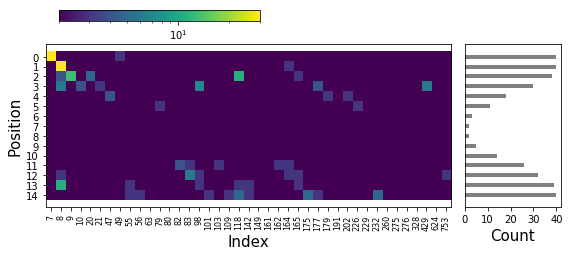

In [19]:
urea_3 = GetPiStackJunctionMatrix(pidata,3)
# Show top rank features only
urea_3_mat = urea_3[urea_3.sum(axis=1)>=2]
fig = plt.figure(figsize=(9.3,3))
gs = gridspec.GridSpec(nrows=1, ncols=5, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:4])
ax0_marg_x = fig.add_subplot(gs[0,4],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(urea_3_mat+1), interpolation="nearest",norm=LogNorm(vmin=2, vmax=np.max(urea_3_mat)))
cbaxes = fig.add_axes([0.15, 0.99,0.3,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,urea_3_mat.shape[0]))
ax0_joint.set_xticklabels(np.where(urea_3.sum(axis=1)>=2)[0],fontsize=8,rotation=90)
ax0_joint.set_yticks(np.arange(15))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(15)),urea_3.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,41,10))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()

# Ketone

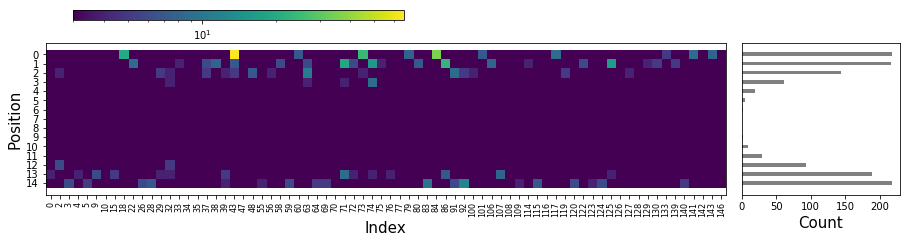

In [20]:
ketone = GetPiStackJunctionMatrix(pidata,4)
# Show top rank features only
ketone_mat = ketone[ketone.sum(axis=1)>=4]
fig = plt.figure(figsize=(15.3,2.8))
gs = gridspec.GridSpec(nrows=1, ncols=5, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:4])
ax0_marg_x = fig.add_subplot(gs[0,4],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(ketone_mat+1), interpolation="nearest",norm=LogNorm(vmin=3, vmax=np.max(ketone_mat)))
cbaxes = fig.add_axes([0.15, 0.99,0.3,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,ketone_mat.shape[0]))
ax0_joint.set_xticklabels(np.where(ketone.sum(axis=1)>=2)[0],fontsize=8,rotation=90)
ax0_joint.set_yticks(np.arange(15))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(15)),ketone.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,201,50))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()

# Ester

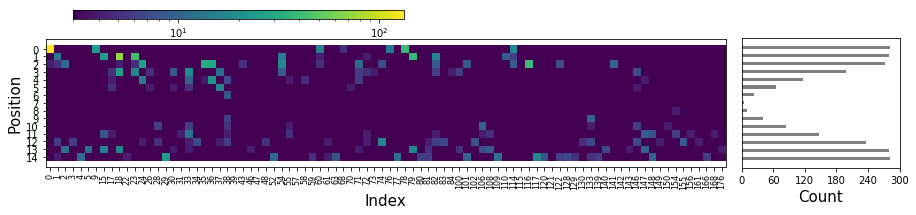

In [21]:
ester = GetPiStackJunctionMatrix(pidata,5)
# Show top rank features only
ester_mat = ester[ester.sum(axis=1)>=6]
fig = plt.figure(figsize=(15.3,2.4))
gs = gridspec.GridSpec(nrows=1, ncols=5, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:4])
ax0_marg_x = fig.add_subplot(gs[0,4],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(ester_mat+1), interpolation="nearest",norm=LogNorm(vmin=3, vmax=np.max(ester_mat)))
cbaxes = fig.add_axes([0.15, 0.99,0.3,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,ester_mat.shape[0]))
ax0_joint.set_xticklabels(np.where(ester.sum(axis=1)>=2)[0],fontsize=8,rotation=90)
ax0_joint.set_yticks(np.arange(15))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(15)),ester.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,301,60))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()

# Ether



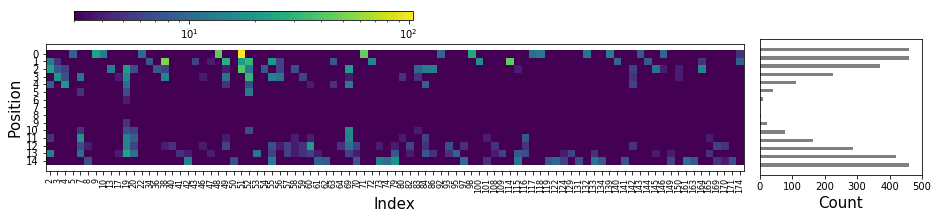

In [22]:
ether = GetPiStackJunctionMatrix(pidata,6)
# Show top rank features only
ether_mat = ether[ether.sum(axis=1)>=7]
fig = plt.figure(figsize=(15.7,2.5))
gs = gridspec.GridSpec(nrows=1, ncols=5, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:4])
ax0_marg_x = fig.add_subplot(gs[0,4],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(ether_mat+1), interpolation="nearest",norm=LogNorm(vmin=3, vmax=np.max(ether_mat)))
cbaxes = fig.add_axes([0.15, 0.99,0.3,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,ether_mat.shape[0]))
ax0_joint.set_xticklabels(np.where(ether.sum(axis=1)>=2)[0],fontsize=8,rotation=90)
ax0_joint.set_yticks(np.arange(15))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(15)),ether.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,501,100))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()

# Amide

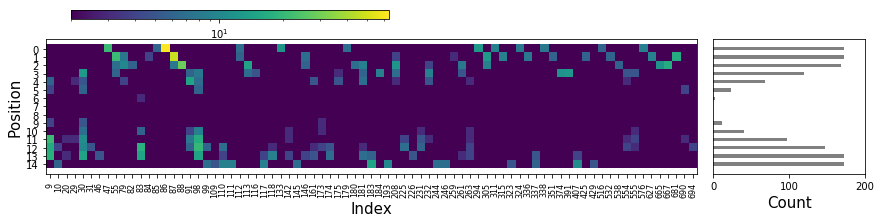

In [23]:
amide_1 = GetPiStackJunctionMatrix(pidata,7)
# Show top rank features only
amide_1_mat = amide_1[amide_1.sum(axis=1)>=4]
fig = plt.figure(figsize=(14.7,2.5))
gs = gridspec.GridSpec(nrows=1, ncols=5, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:4])
ax0_marg_x = fig.add_subplot(gs[0,4],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(amide_1_mat+1), interpolation="nearest",norm=LogNorm(vmin=2, vmax=np.max(amide_1_mat)))
cbaxes = fig.add_axes([0.15, 0.99,0.3,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,amide_1_mat.shape[0]))
ax0_joint.set_xticklabels(np.where(amide_1.sum(axis=1)>=2)[0],fontsize=8,rotation=90)
ax0_joint.set_yticks(np.arange(15))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(15)),amide_1.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,201,100))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()

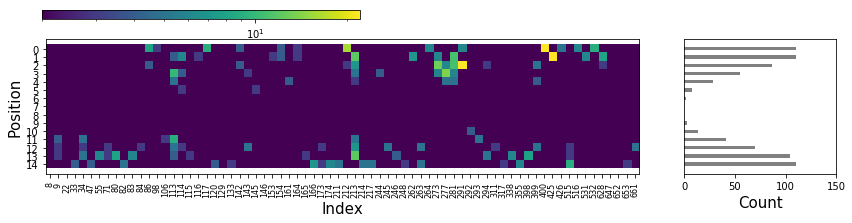

In [24]:
amide_2 = GetPiStackJunctionMatrix(pidata,8)
# Show top rank features only
amide_2_mat = amide_2[amide_2.sum(axis=1)>=3]
fig = plt.figure(figsize=(14.7,2.5))
gs = gridspec.GridSpec(nrows=1, ncols=5, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:4])
ax0_marg_x = fig.add_subplot(gs[0,4],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(amide_2_mat+1), interpolation="nearest",norm=LogNorm(vmin=2, vmax=np.max(amide_2_mat)))
cbaxes = fig.add_axes([0.15, 0.99,0.3,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,amide_2_mat.shape[0]))
ax0_joint.set_xticklabels(np.where(amide_2.sum(axis=1)>=2)[0],fontsize=8,rotation=90)
ax0_joint.set_yticks(np.arange(15))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(15)),amide_2.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,151,50))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()

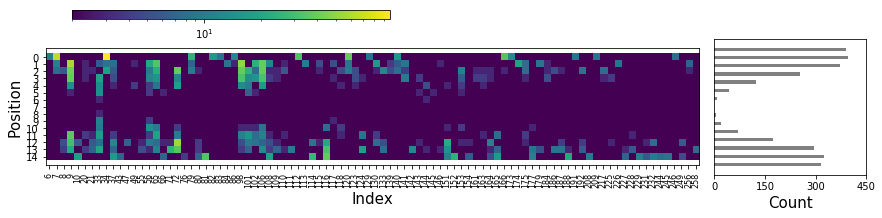

In [25]:
amide_3 = GetPiStackJunctionMatrix(pidata,9)
# Show top rank features only
amide_3_mat = amide_3[amide_3.sum(axis=1)>=7]
fig = plt.figure(figsize=(14.7,2.5))
gs = gridspec.GridSpec(nrows=1, ncols=5, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:4])
ax0_marg_x = fig.add_subplot(gs[0,4],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(amide_3_mat+1), interpolation="nearest",norm=LogNorm(vmin=2, vmax=np.max(amide_3_mat)))
cbaxes = fig.add_axes([0.15, 0.99,0.3,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,amide_3_mat.shape[0]))
ax0_joint.set_xticklabels(np.where(amide_3.sum(axis=1)>=2)[0],fontsize=8,rotation=90)
ax0_joint.set_yticks(np.arange(15))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(15)),amide_3_mat.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,451,150))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()